# MLP for Complex Problems part 2 (regularization) : The MNIST dataset



In this exercise you will learn how to apply regularisation L1 and L2 techniques to Multi-Layer Perceptron (MLP, with one or more hidden layers). This will be the MNIST dataset, a well known neural network problem for the recognition of the 10 handwritten characters from 0 to 9 ([MNIST](http://yann.lecun.com/exdb/mnist/)).

This exercise is an extention of the previous lab on MLP extracted from  Gulli & Pal (2017) 'Deep Learning with Keras' textbook.


**Importing the libraries and defining the main training parameters**

The initial code is necessary to prepare the data and the simulation (hyper)parameters.
We first import numpy. In our case we will use it to create and pre-process the array of the training data sets.  The matplotlib library will be used for visualising some MNIST images and the plot of the training results.

The code also defines the variables for some of the main parameters used throughout this program. 
The random seed definition is also important to be able to repeat the same parameter configuration.

In [1]:
# import of numpy and keras libraries
from __future__ import print_function
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
import matplotlib.pyplot as plt

# variables for network and training
N_EPOCH = 200 # initially set at 200 ; you can change this later
BATCH_SIZE = 128
VERBOSE = 1
N_CLASSES = 10   # number of classes/categories of digits from 0 to 9, i.e. number of output units
OPTIMIZER = SGD(learning_rate=0.1) # Stochastic gradient descent optimiser
N_HIDDEN = 128   # number of hidden units
VALIDATION_SPLIT=0.2 # proportion of the dataset used for validation, with remaining .8 for training

#each 2D image consists of 28x28 values/pixels, which needs to be reshaped in a vector of 784 pixels
RESHAPED = 784

# random seed number to be used for reproducibility
np.random.seed(1671)


2025-02-03 12:45:48.550371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Preparing the MNIST dataset and visualising the input images**

This part of the code prepares the input and output training set, and the corresponding test sets. 
It also visualises a sample image. The MNIST dataset is included in the Keras program and we do not need to use and external file.

Training data input shape:  (60000, 28, 28)
Training data output shape:  (60000,)
Test data input shape:  (10000, 28, 28)
Test data ouput shape:  (10000,)
Sample input image: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0 

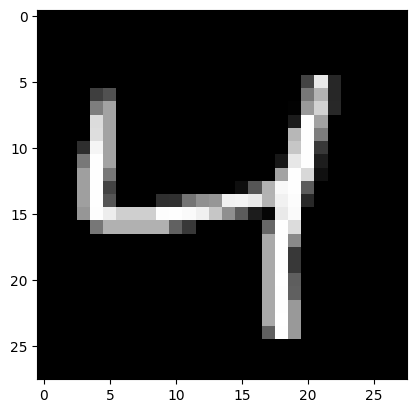

In [ ]:

# data: shuffled and split between train and test sets, loading and using the Keras mnist dataset
(input_X_train, output_Y_train), (input_X_test, output_Y_test) = mnist.load_data()

# print the shapes of the input and output data
print("Training data input shape: " , input_X_train.shape)
print("Training data output shape: " , output_Y_train.shape)
print("Test data input shape: " , input_X_test.shape)
print("Test data ouput shape: " , output_Y_test.shape)

# visualisation of the numerical vector and plot of a selected image
Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image, cmap='gray')
plt.show()


The input images now have to be reshaped as a linear vector. That is, we go from a 2D image of 28x28 pixels, to a linear vector of 784 (i.e. 28*28) pixels, to be passed as the 784 input units. Moreover, the initial pixel grey values given as type __int__ in the range 0-255 will be normalised to the __float32__ type in the range 0-1. 


In [ ]:
# use 60000 images for training, 10000 for validation test
input_X_train = input_X_train.reshape(60000, RESHAPED)
input_X_test = input_X_test.reshape(10000, RESHAPED)
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')

# normalisation of the pixel values from 0-255 range to 0-1 range
input_X_train /= 255
input_X_test /= 255

print ("Input data ready")

Input data ready


**Preparing the output labels**

This code converts the output data into categorical (one-hot encoding) vectors of 0s and 1s.
See example of the visualisation of the one-hot vector for the selected image.

In [4]:
# convert class vectors to binary class matrices
output_Y_train = utils.to_categorical(output_Y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_Y_test, N_CLASSES)

# print the categorical, one-hot output vector for the sample image
label = output_Y_train[Selected_Image]
print ("One-hot-vector: " + str(label))

One-hot-vector: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Training the Multi-Layer Perceptron with L1 and L2 regularisation

**Defining the network: Multi-Layer Perceptron**

We will now create a multi-layer perceptron with 784 input units, two hidden layers with 128 hidden units each, and an output layer with the 10 units.



# Adding regularizers to reduce overfitting

Keras provides a weight regularization API that allows you to add a penalty for weight size to the loss function.
https://keras.io/api/layers/regularizers/

By default, no regularizer is used in any layers.

A weight regularizer can be added to each layer when the layer is defined in a Keras model.
This is achieved by setting the kernel_regularizer argument on each layer. A separate regularizer can also be used for the bias via the bias_regularizer argument, although this is less often used.
The layers expose 3 keyword arguments:

kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
bias_regularizer: Regularizer to apply a penalty on the layer's bias
activity_regularizer: Regularizer to apply a penalty on the layer's output

Three different regularizer instances are provided; they are:

L1: Sum of the absolute weights.
L2: Sum of the squared weights.
L1L2: Sum of the absolute and the squared weights.
The regularizers are provided under keras.regularizers and have the names l1, l2 and l1_l2. Each takes the regularizer hyperparameter as an argument. 


In [5]:
# example of L1,l2 regularizers


# import the regularizers
from tensorflow.keras import regularizers

N_EPOCH = 20
N_HIDDEN = 128

model = Sequential()

# Hidden layer 1 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L1(1e-5), activity_regularizer=regularizers.L2(1e-4),input_shape=(RESHAPED,)))
model.add(Activation('relu'))
# Hidden layer 2 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),  bias_regularizer=regularizers.L1(1e-5),activity_regularizer=regularizers.L2(1e-4)))
model.add(Activation('relu'))

# output layer with 10 units and softmax activation
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Summary of the whole model
model.summary()

# model compilation
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

**Let's train the multi-layer perceptron network**

Let's now train (fit) the network with the above-defined batch size (128), and number of epochs (20).

In [6]:

#train the network
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7503 - loss: 1.5209 - val_accuracy: 0.9243 - val_loss: 0.7086
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9222 - loss: 0.6853 - val_accuracy: 0.9381 - val_loss: 0.5729
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9338 - loss: 0.5775 - val_accuracy: 0.9418 - val_loss: 0.5279
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9381 - loss: 0.5395 - val_accuracy: 0.9492 - val_loss: 0.4826
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9460 - loss: 0.4900 - val_accuracy: 0.9509 - val_loss: 0.4568
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9292 - loss: 0.6017 - val_accuracy: 0.9578 - val_loss: 0.4136
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9213 - loss: 0.6702 - val_accuracy: 0.9431 - val_loss: 0.4643
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9408 - loss: 0.5051 - val_accuracy: 0

**Looking at the results of the trained network**

Let's explotre the results both for the score and accuracy values, as well as to visualise the plots of these values during the training.

In [7]:
#test the network
score = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9580 - loss: 0.2438

Test score/loss: 0.21913063526153564
Test accuracy: 0.9671000242233276


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


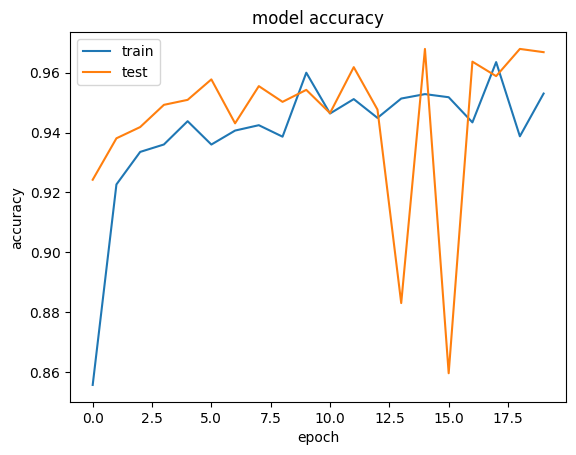

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


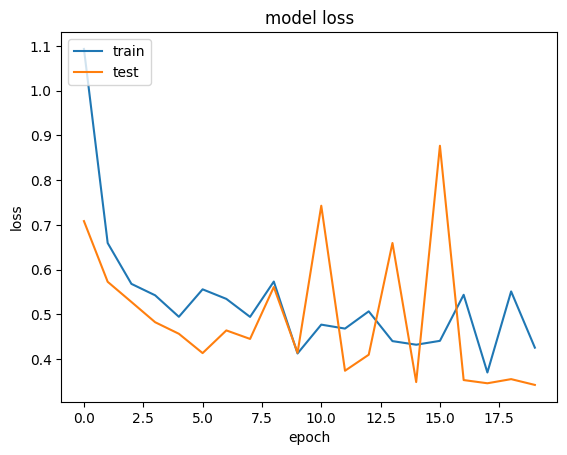

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Looking at the results of the trained optimised network**

Let's explore the effects of adding regularisation on the network performance, varying the parameters for L1 or L1L2

# Conclusions
-------------

With this tutorial we have practiced a Multi-Layer Perceptron with regularisation to reduce overfitting, with a benchmark dataset containing images of handwritten numbers.
L1 and L2 regularization are only active during training. They are not present when making predictions.
L1 and L2 regularization are applied per-layer basis.
It is possible to apply both L1 and L2 regularization at the same time in a layer.
L1 and L2 regularization are typically used for smaller networks. For larger networks, it is better to use neural network-specific regularization which is dropout regularization.
An evaluation procedure must be used when using a regularizer to monitor that regularization process. For this, we can plot model performance against the number of epochs during the training process.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. 2023 Giovanni Masala updates and produced the L1,L2 version. Initial code and examples adapted from Gulli & Pal (2017) Deep Learning with Keras. Punkt Publishing. 